In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the ca_obesity_prevalence dataset
ca_obesity_prevalence = pd.read_csv(r"C:\Users\rruiz\Documents\Datakind\ca_obesity_prevalence.csv")

In [3]:
# View the header of the ca_obesity_prevalence dataset
print(ca_obesity_prevalence.head())

                                 LGHC Indicator Name  \
0  Adult Obesity: Percentage of adults with body ...   
1  Adult Obesity: Percentage of adults with body ...   
2  Adult Obesity: Percentage of adults with body ...   
3  Adult Obesity: Percentage of adults with body ...   
4  Adult Obesity: Percentage of adults with body ...   

  Revised Geography (group) Unstable Flag            Strata Unstable Flag.1  \
0                   Alameda           NaN  Total Population             NaN   
1                     Butte           NaN  Total Population             NaN   
2              Contra Costa           NaN  Total Population             NaN   
3                    Fresno           NaN  Total Population             NaN   
4                      Kern           NaN  Total Population             NaN   

    Year  Avg. Lower 95% CL  Avg. Percent  Avg. Upper 95% CL  \
0  2,018              13.14          18.9              24.74   
1  2,018              19.40          31.7              44.10

In [4]:
# Rename the columns
ca_obesity_prevalence = ca_obesity_prevalence.rename(columns={
    'Revised Geography (group)': 'County',
    'Avg. Percent': 'Adult Obesity Prevalence'
})

# Display the updated DataFrame
print(ca_obesity_prevalence)

                                  LGHC Indicator Name  \
0   Adult Obesity: Percentage of adults with body ...   
1   Adult Obesity: Percentage of adults with body ...   
2   Adult Obesity: Percentage of adults with body ...   
3   Adult Obesity: Percentage of adults with body ...   
4   Adult Obesity: Percentage of adults with body ...   
5   Adult Obesity: Percentage of adults with body ...   
6   Adult Obesity: Percentage of adults with body ...   
7   Adult Obesity: Percentage of adults with body ...   
8   Adult Obesity: Percentage of adults with body ...   
9   Adult Obesity: Percentage of adults with body ...   
10  Adult Obesity: Percentage of adults with body ...   
11  Adult Obesity: Percentage of adults with body ...   
12  Adult Obesity: Percentage of adults with body ...   
13  Adult Obesity: Percentage of adults with body ...   
14  Adult Obesity: Percentage of adults with body ...   
15  Adult Obesity: Percentage of adults with body ...   
16  Adult Obesity: Percentage o

In [5]:
# Sort the DataFrame by the "Adult Obesity Prevalence" in descending order
ca_obesity_prevalence_sorted = ca_obesity_prevalence.sort_values(by='Adult Obesity Prevalence', ascending=False)

# Reset the index and drop the previous index
ca_obesity_prevalence_sorted = ca_obesity_prevalence_sorted.reset_index(drop=True)

# Display the sorted DataFrame with only the "County" and "Adult Obesity Prevalence" columns
print(ca_obesity_prevalence_sorted[['County', 'Adult Obesity Prevalence']])


                                  County  Adult Obesity Prevalence
0                                 Tulare                      43.9
1                                 Fresno                      41.4
2                                 Madera                      39.1
3                               Imperial                      39.0
4                                 Shasta                      38.9
5                                 Solano                      38.2
6                  Colusa, Glenn, Tehama                      37.5
7                                 Merced                      34.8
8                                   Kern                      34.5
9                                  Kings                      34.0
10                                Sonoma                      33.2
11                                  Lake                      32.8
12                                Sutter                      32.6
13                                  Yuba                      

In [6]:
from PyPDF2 import PdfReader

# Import the ca_food_insecurity pdf

pdf_file_path = "C:\\Users\\rruiz\\Documents\\Datakind\\ca_food_insecurity.pdf"

# Open the PDF file in binary read mode
with open(pdf_file_path, 'rb') as pdf_file:
    # Create a PDF reader object
    pdf_reader = PdfReader(pdf_file)
    
    # Extract the text from the first (and only) page
    pdf_text = pdf_reader.pages[0].extract_text()

# Display the extracted text (Optional)
print(pdf_text[:500])  # Display the first few characters of the text


Map the Meal Gap 2018:
Overall  Food Insecurity in California by County in 20161
County PopulationFood 
insecurity 
rateEstimated number 
food insecure 
individuals (rounded)% below 200% poverty % above 200% poverty
Alameda 1,605,217             13.4% 214,370 63% 37%
Alpine 1,184                     15.2% 180 69% 31%
Amador 36,963                  12.8% 4,710 59% 41%
Butte 223,877                17.0% 38,000 79% 21%
Calaveras 44,787                  13.0% 5,840 71% 29%
Colusa 21,361             


In [7]:
import re

# Assuming the extracted PDF text is stored in the 'pdf_text' variable

# Split the text into lines and skip the first 7 rows
lines = pdf_text.strip().split('\n')[7:]

# Initialize lists to store data for each column
counties = []
population_sizes = []
food_insecurity_rates = []

# Regular expression pattern to match County, Population Size, and Food Insecurity Rate
pattern = r'^(.+?)\s+([\d,]+)\s+([\d.]+)%'

# Process each line and extract data for the three columns
for line in lines:
    # Use regular expression to find County, Population Size, and Food Insecurity Rate
    match = re.match(pattern, line)
    
    if match:
        county, population_size, food_insecurity_rate = match.groups()
        counties.append(county.strip())
        population_sizes.append(int(population_size.replace(',', '').strip()))
        food_insecurity_rates.append(float(food_insecurity_rate.strip()))

# Create a new DataFrame
data = {
    'County': counties,
    'Population Size': population_sizes,
    'Food Insecurity Rate': food_insecurity_rates
}
ca_food_insecurity = pd.DataFrame(data)

# Display the new DataFrame
print(ca_food_insecurity)

             County  Population Size  Food Insecurity Rate
0           Alameda          1605217                  13.4
1            Alpine             1184                  15.2
2            Amador            36963                  12.8
3             Butte           223877                  17.0
4         Calaveras            44787                  13.0
5            Colusa            21361                  11.3
6      Contra Costa          1107925                  11.1
7         Del Norte            27628                  16.8
8         El Dorado           183000                  11.7
9            Fresno           963160                  14.5
10            Glenn            27976                  13.2
11         Humboldt           135182                  17.1
12         Imperial           178807                  15.0
13             Inyo            18326                  11.7
14             Kern           871337                  13.6
15            Kings           150261                  13

In [8]:
# Sort the DataFrame by the "Food Insecurity Rate" in descending order
ca_food_insecurity_sorted = ca_food_insecurity.sort_values(by='Food Insecurity Rate', ascending=False)

# Reset the index and remove the old index
ca_food_insecurity_sorted = ca_food_insecurity_sorted.reset_index(drop=True)

# Display the sorted DataFrame without the index
print(ca_food_insecurity_sorted)

             County  Population Size  Food Insecurity Rate
0          Siskiyou            43668                  18.4
1           Trinity            13180                  17.6
2          Humboldt           135182                  17.1
3              Lake            64076                  17.0
4             Butte           223877                  17.0
5         Del Norte            27628                  16.8
6            Shasta           179228                  16.8
7            Plumas            18754                  16.1
8          Mariposa            17645                  15.6
9        Sacramento          1479300                  15.6
10           Lassen            31945                  15.5
11           Alpine             1184                  15.2
12           Tehama            63015                  15.1
13         Imperial           178807                  15.0
14            Modoc             9033                  15.0
15           Sutter            95406                  15

In [9]:
# Calculate the correlation coefficient between the two columns
correlation_coefficient = ca_obesity_prevalence['Adult Obesity Prevalence'].corr(ca_food_insecurity['Food Insecurity Rate'])

# Display the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

# Determine if there is a correlation
if correlation_coefficient > 0:
    print("There is a positive correlation between obesity and food insecurity.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between obesity and food insecurity.")
else:
    print("There is no correlation between obesity and food insecurity.")


Correlation Coefficient: 0.1446436505322273
There is a positive correlation between obesity and food insecurity.


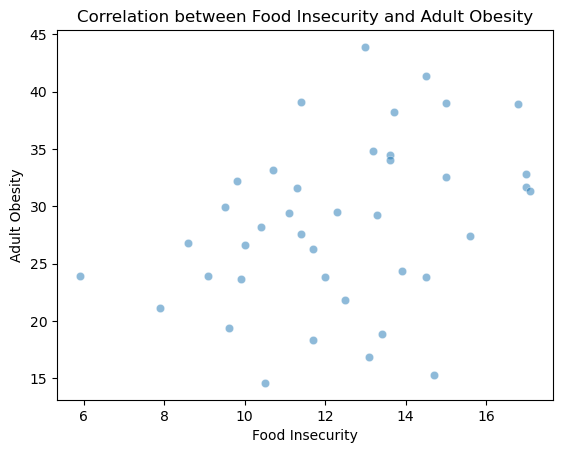

In [10]:
# Merge the two DataFrames on the "County" column
merged_data = pd.merge(ca_obesity_prevalence, ca_food_insecurity, left_on='County', right_on='County')

# Create a scatter plot using Seaborn
sns.scatterplot(x='Food Insecurity Rate', y='Adult Obesity Prevalence', data=merged_data, alpha=0.5)

# Add labels and title
plt.xlabel('Food Insecurity')
plt.ylabel('Adult Obesity')
plt.title('Correlation between Food Insecurity and Adult Obesity')

# Show the plot
plt.show()